In [1]:
#I followed this tutorial to create the PCA: https://www.youtube.com/watch?v=oiusrJ0btwA
# Repo: https://github.com/dataprofessor/code/blob/master/python/PCA_analysis.ipynb
# Since it wasn't specific enough I had a look at this guide: 
#https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
from sklearn.preprocessing import LabelEncoder # to transform string values of the Data
import matplotlib.pyplot as plt # for plotting

In [2]:
#Preparing the data
df = pd.read_csv('data/data_pca_statelevel.csv')
lb = LabelEncoder()


df['ds'] = lb.fit_transform(df['ds'])
df['state'] = lb. fit_transform(df['state'])
input_columns = list(df.columns)
input_columns.remove('single_tile_users t-8')

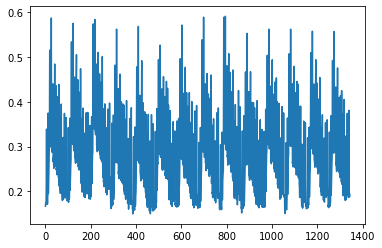

In [3]:
plt.plot(df['single_tile_users t-8']);

In [4]:
#Standardizing the data
X = df[input_columns] # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

In [5]:
#Apply PCA
pca = PCA()
X_pca = pca.fit(X_std)

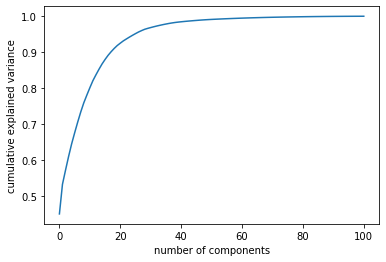

In [6]:
#Determine the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
#Dimensionality Reduction: Now we know that we need about 20 components only, 
#so we can apply PCA with 20 components to get the reduced dataset.

num_components = 20
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

#Shorter version of previous steps:
#pca = PCA(n_components = 0.99) #PCA will select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
#X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
#print(pca.n_components_) # one can print and see how many components are selected. 

In [8]:
#Finding the most important features set
#pd.DataFrame(pca.components_, columns = df.columns) #uncomment to get the results displayed as a df

#automated process of extracting important features
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the most important feature names
most_important_names = [input_columns[most_important[i]] for i in range(n_pcs)]
most_important_names

['driving t-8',
 'ds',
 'grocery_and_pharmacy t-9',
 'workplaces t-3',
 'grocery_and_pharmacy t-7',
 'single_tile_users t-3',
 'single_tile_users t-5',
 'single_tile_users t-6',
 'grocery_and_pharmacy t-8',
 'workplaces',
 'grocery_and_pharmacy t-10',
 'grocery_and_pharmacy t-1',
 'state',
 'grocery_and_pharmacy t-5',
 'state',
 'state',
 'parks t-10',
 'single_tile_users t-10',
 'parks t-7',
 'single_tile_users t-6']